<a href="https://colab.research.google.com/github/RhuthuHegde/Song-Data-Analysis--Big-Data-Project/blob/master/Song_Analysis_And_Recommendation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install pyspark
!{sys.executable} -m pip install seaborn

     |████████████████████████████████| 281.4 MB 36 kB/s 
     |████████████████████████████████| 198 kB 53.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=dd2e2df320ac171670703b8c467303e5763e3690e94e182f4e425c450897f9cd
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark


In [ ]:
!pip install pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


In [ ]:
import findspark
findspark.init()
findspark.find()

'/usr/local/lib/python3.7/dist-packages/pyspark'

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [ ]:
import pyspark
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import pyspark.sql.functions as F
import pyspark.sql.functions as f
from pyspark.sql.functions import udf,col
import plotly.express as px
data = '/content/sample_data/Final database.csv'


In [ ]:
spark = SparkSession.builder.master("local").appName("Music-Data-Analysis").getOrCreate()
spark

In [ ]:
# df = spark.read.csv(data, header=True, inferSchema=True)

In [ ]:
sc = spark.sparkContext
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
df = spark.read.option("header",True).csv(data)
to_drop=['syuzhet_norm', 'bing_norm', 'afinn_norm', 'nrc_norm', 'syuzhet', 'bing'] 
for c in to_drop:
    df.drop(c).collect()
df.printSchema

<bound method DataFrame.printSchema of DataFrame[Country0: string, Uri: string, Popularity: string, Title: string, Artist: string, Album/Single: string, Genre: string, Artist_followers: string, Explicit: string, Album9: string, Release_date: string, Track_number: string, Tracks_in_album: string, danceability: string, energy: string, key: string, loudness: string, mode: string, speechiness: string, acoustics: string, instrumentalness: string, liveliness: string, valence: string, tempo: string, duration_ms: string, time_signature: string, Genre_new: string, Days_since_release: string, Released_after_2017: string, Explicit_false: string, Explicit_true: string, album31: string, compilation: string, single: string, bolero: string, boy band: string, country36: string, dance/electronic: string, else: string, funk: string, hip hop: string, house: string, indie: string, jazz: string, k-pop: string, latin: string, metal: string, opm: string, pop: string, r&b/soul: string, rap: string, reggae: st

In [ ]:
numerical_features = ['danceability', 'energy', 'instrumentalness', 'valence', 'liveliness', 'speechiness', 'acoustics',
                      'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 
                      'time_signature', 'Days_since_release', 'n_words']
for c in numerical_features:
    df = df.withColumn(c, df[c].cast("float"))

#### Popular Artist

In [ ]:
df.head(10)

[Row(Country0='Global', Uri='https://open.spotify.com/track/6FyRXC8tJUh863JCkyWqtk', Popularity='31833.95', Title='adan y eva', Artist='Paulo Londra', Album/Single='single', Genre='argentine hip hop', Artist_followers='11427104', Explicit='FALSE', Album9='Adan y Eva', Release_date='05-11-2018', Track_number='1', Tracks_in_album='1', danceability=0.7670000195503235, energy=0.7089999914169312, key='1', loudness='-4.47', mode='1', speechiness=0.335999995470047, acoustics=0.3230000138282776, instrumentalness=0.0, liveliness=0.06759999692440033, valence=0.7200000286102295, tempo=171.9929962158203, duration_ms=258639.0, time_signature=4.0, Genre_new='hip hop', Days_since_release=740.0, Released_after_2017='1', Explicit_false='1', Explicit_true='0', album31='0', compilation='0', single='1', bolero='0', boy band='0', country36='0', dance/electronic='0', else='0', funk='0', hip hop='1', house='0', indie='0', jazz='0', k-pop='0', latin='0', metal='0', opm='0', pop='0', r&b/soul='0', rap='0', reg

In [ ]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Popular Artists')

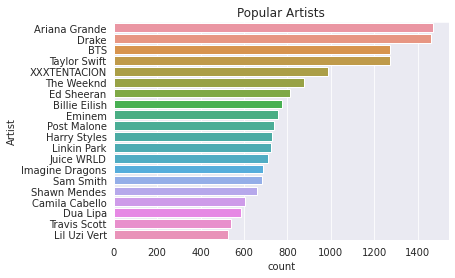

In [ ]:
popular_artist = df.groupBy("Artist").count().orderBy("count",ascending=False).limit(20).toPandas()
sns.barplot(data=popular_artist,y='Artist',x='count').set_title('Popular Artists')

In [ ]:
df.dtypes

[('Country0', 'string'),
 ('Uri', 'string'),
 ('Popularity', 'string'),
 ('Title', 'string'),
 ('Artist', 'string'),
 ('Album/Single', 'string'),
 ('Genre', 'string'),
 ('Artist_followers', 'string'),
 ('Explicit', 'string'),
 ('Album9', 'string'),
 ('Release_date', 'string'),
 ('Track_number', 'string'),
 ('Tracks_in_album', 'string'),
 ('danceability', 'float'),
 ('energy', 'float'),
 ('key', 'string'),
 ('loudness', 'string'),
 ('mode', 'string'),
 ('speechiness', 'float'),
 ('acoustics', 'float'),
 ('instrumentalness', 'float'),
 ('liveliness', 'float'),
 ('valence', 'float'),
 ('tempo', 'float'),
 ('duration_ms', 'float'),
 ('time_signature', 'float'),
 ('Genre_new', 'string'),
 ('Days_since_release', 'float'),
 ('Released_after_2017', 'string'),
 ('Explicit_false', 'string'),
 ('Explicit_true', 'string'),
 ('album31', 'string'),
 ('compilation', 'string'),
 ('single', 'string'),
 ('bolero', 'string'),
 ('boy band', 'string'),
 ('country36', 'string'),
 ('dance/electronic', 'strin

#### Popular Artist in UK

In [ ]:
df.registerTempTable("music_data")

In [ ]:
popular_artist_specific_country_uk = spark.sql('SELECT Artist, ROUND(SUM(Popularity), 2) AS Populartiy \
                 FROM music_data \
                 WHERE UK == 1 \
                 GROUP BY Artist \
                 ORDER BY AVG(Popularity) DESC \
                 LIMIT 15'
               )
popular_artist_specific_country_uk.show(20, truncate=False)
# type(popular_artist_specific_country_uk)

+---------------------------------------------------------------------------------+----------+
|Artist                                                                           |Populartiy|
+---------------------------------------------------------------------------------+----------+
|Calvin Harris - Dua Lipa                                                         |102479.25 |
|Marshmello - Bastille                                                            |84639.15  |
|Keala Settle - The Greatest Showman Ensemble                                     |82456.05  |
|Clean Bandit - Zara Larsson                                                      |71408.25  |
|Roddy Ricch                                                                      |71282.0   |
|Calvin Harris - Sam Smith - Jessie Reyez                                         |70113.45  |
|DJ Khaled - Rihanna - Bryson Tiller                                              |66377.45  |
|George Ezra                                      

Text(0.5, 1.0, 'Popular Artists in UK')

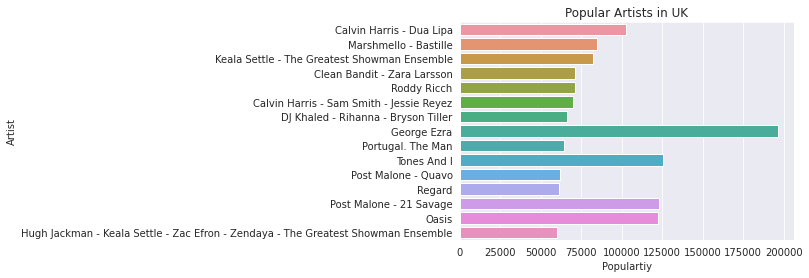

In [ ]:
sns.barplot(data=popular_artist_specific_country_uk.toPandas(),y='Artist',x='Populartiy').set_title('Popular Artists in UK')

Popular Artist in US

In [ ]:
popular_artist_specific_country_usa = spark.sql('SELECT Artist, ROUND(SUM(Popularity), 2) AS Populartiy \
                 FROM music_data \
                 WHERE USA == 1 \
                 GROUP BY Artist \
                 ORDER BY AVG(Popularity) DESC \
                 LIMIT 15'
               )
popular_artist_specific_country_usa.show(20, truncate=False)

+---------------------------------------+----------+
|Artist                                 |Populartiy|
+---------------------------------------+----------+
|Post Malone - Quavo                    |130719.15 |
|XXXTENTACION - Trippie Redd            |97016.35  |
|Meek Mill - Drake                      |83235.95  |
|Post Malone - 21 Savage                |159633.25 |
|Billie Eilish - Khalid                 |79693.9   |
|Marshmello - Bastille                  |74560.5   |
|Cardi B - Bad Bunny - J Balvin         |74381.6   |
|Migos - Lil Uzi Vert                   |70138.2   |
|BlocBoy JB - Drake                     |69576.75  |
|Kendrick Lamar - Zacari                |67838.15  |
|A Boogie Wit da Hoodie - 6ix9ine       |65935.2   |
|Juice WRLD - YoungBoy Never Broke Again|65020.95  |
|Mustard - Roddy Ricch                  |61341.0   |
|Kodak Black - XXXTENTACION             |51274.6   |
|Khalid - Normani                       |48685.35  |
+---------------------------------------+-----

Text(0.5, 1.0, 'Popular Artists in a Country-USA')

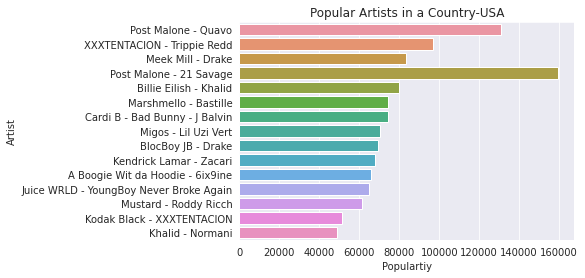

In [ ]:
sns.barplot(data=popular_artist_specific_country_usa.toPandas(),y='Artist',x='Populartiy').set_title('Popular Artists in a Country-USA')

#### Songs released in a particular year

Songs released in the year 2016,2019 and 2013

In [ ]:
df = spark.read.option("header",True).csv(data)

In [ ]:
df.filter(F.year(df['Release_date'])==2016).select('Title','Artist','Release_date','Genre').distinct().show(15,truncate=False)

+--------+----------------+------------+-------------+
|Title   |Artist          |Release_date|Genre        |
+--------+----------------+------------+-------------+
|chantaje|Shakira - Maluma|2016        |colombian pop|
+--------+----------------+------------+-------------+



In [ ]:
df.filter(F.year(df['Release_date'])==2019).select('Title','Artist','Release_date','Genre').distinct().show(10,truncate=False)

+----------------+--------------------------+------------+--------------+
|Title           |Artist                    |Release_date|Genre         |
+----------------+--------------------------+------------+--------------+
|lost in the fire|Gesaffelstein - The Weeknd|2019        |destroy techno|
+----------------+--------------------------+------------+--------------+



In [ ]:
df.filter(F.year(df['Release_date'])==2013).select('Title','Artist','Release_date','Genre').distinct().show(10,truncate=False)

+-----------------+----------------------------------------------+------------+-----------------------+
|Title            |Artist                                        |Release_date|Genre                  |
+-----------------+----------------------------------------------+------------+-----------------------+
|thinking out loud|Ed Sheeran                                    |2013        |pop                    |
|f**kin problems  |A$AP Rocky - Drake - 2 Chainz - Kendrick Lamar|2013        |east coast hip hop     |
|photograph       |Ed Sheeran                                    |2013        |pop                    |
|tenerife sea     |Ed Sheeran                                    |2013        |pop                    |
|dont             |Ed Sheeran                                    |2013        |pop                    |
|take me to church|Hozier                                        |2013        |irish singer-songwriter|
|all of me        |John Legend                                  

#### Most Popular Genres

In [ ]:
spark.sql('SELECT Genre,Count(*) as popularity_vote from music_data GROUP BY Genre ORDER BY popularity_vote DESC').show(10)

+----------------+---------------+
|           Genre|popularity_vote|
+----------------+---------------+
|       dance pop|          20503|
|             pop|           6200|
|           latin|           3730|
|     atl hip hop|           3589|
|         hip hop|           2955|
|canadian hip hop|           2529|
|         emo rap|           2423|
|           k-pop|           2094|
|        big room|           2045|
|     melodic rap|           1982|
+----------------+---------------+
only showing top 10 rows



In [ ]:
spark.sql('select * from music_data').show(10)

+-----------+--------------------+----------+----------+------------+------------+-----------------+----------------+--------+----------+------------+------------+---------------+------------+------+---+--------+----+-----------+---------+----------------+----------+-------+-------+-----------+--------------+---------+------------------+-------------------+--------------+-------------+-------+-----------+------+------+--------+---------+----------------+----+----+-------+-----+-----+----+-----+-----+-----+---+---+--------+---+------+---------+----+----+------------+---------+----------+--------+-------+----+-----+----+-----+------------+-------+----+----+-------+--------+-----+--------+--------+-------+----------+-----------------+------------+---------+--------+------------+-------------+----------+-------------+-------------+-----------+------------------+-------------+----------+---------+-------------+--------------+-----------+--------------+--------------+---------------+--------

#### Most Popular Genres per decade

In [ ]:
popular_genres = spark.sql('SELECT  \
                    ROUND(Year(Release_date), -1) AS Decade, \
                    Genre \
                FROM music_data \
                WHERE ROUND(Year(Release_date), -1) IS NOT NULL \
                GROUP BY Decade, Genre \
                ORDER BY COUNT(Genre) DESC \
                ') \
            .dropDuplicates(subset=['Decade']) \
            .orderBy('Decade') \
            .show()

+------+-----------------+
|Decade|            Genre|
+------+-----------------+
|  1950|  adult standards|
|  1960|  adult standards|
|  1970|  adult standards|
|  1980|       album rock|
|  1990|   classic uk pop|
|  2000|alternative metal|
|  2010|              pop|
|  2020|          hip hop|
+------+-----------------+



**Music changing over the decades**

In [ ]:
sound_features = ['danceability', 'energy', 'instrumentalness', 'valence', 'liveliness', 'speechiness', 'acoustics']
col_names = ['Decade']
col_names.extend(sound_features)
music_change = df.sample(.2, seed=42) \
                      .groupBy(F.round(F.year(df.Release_date), -1)) \
                      .agg({feature: 'mean' for feature in sound_features}) \
                      .toDF(*col_names) \
                      .orderBy('Decade') \
                      .toPandas() \
                      .dropna(axis=0)

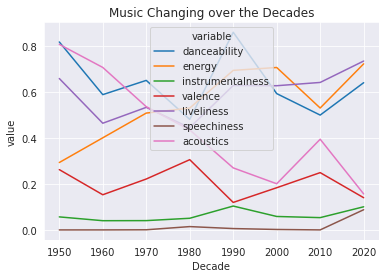

In [ ]:
sns.lineplot(data=pd.melt(music_change, ['Decade']), x='Decade', y='value', hue='variable').set_title('Music Changing over the Decades');

**Cosine similarity to see how two songs of a genre are similar**

In [ ]:
kpop_songs = spark.sql('SELECT Title, Artist, {} \
                          FROM music_data \
                          WHERE `k-pop` = 1 \
                          ' \
                         .format(', '.join(numerical_features)) \
                        ) \
                    .sample(.1) \
                    .dropna() \
                    .toPandas()
rock_songs = spark.sql('SELECT Title, Artist, {} \
                          FROM music_data \
                          WHERE rock = 1 \
                          ' \
                         .format(', '.join(numerical_features)) \
                        ) \
                    .sample(.1) \
                    .dropna() \
                    .toPandas()

In [ ]:
kpop_songs.head()

,Title,Artist,danceability,energy,instrumentalness,valence,liveliness,speechiness,acoustics,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Days_since_release,n_words
0,outnumbered,Dermot Kennedy,0.614,0.684,0.000000,0.258,0.0976,0.1570,0.24700,0.1570,0.24700,0.000000,0.0976,0.258,156.850006,245700.0,4.0,520.0,241.0
1,chicken noodle soup,j-hope - Becky G,0.826,0.817,0.000011,0.168,0.2940,0.0921,0.00502,0.0921,0.00502,0.000011,0.2940,0.168,97.053001,235497.0,4.0,414.0,474.0
2,chicken noodle soup,j-hope - Becky G,0.826,0.817,0.000011,0.168,0.2940,0.0921,0.00502,0.0921,0.00502,0.000011,0.2940,0.168,97.053001,235497.0,4.0,414.0,474.0
3,more,K/DA - Madison Beer - (G)I-DLE - Lexie Liu - J...,0.660,0.787,0.000000,0.199,0.3230,0.0320,0.00257,0.0320,0.00257,0.000000,0.3230,0.199,142.018005,217088.0,4.0,17.0,1344.0
4,more,K/DA - Madison Beer - (G)I-DLE - Lexie Liu - J...,0.660,0.787,0.000000,0.199,0.3230,0.0320,0.00257,0.0320,0.00257,0.000000,0.3230,0.199,142.018005,217088.0,4.0,17.0,1344.0


In [ ]:
rock_songs.head()

,Title,Artist,danceability,energy,instrumentalness,valence,liveliness,speechiness,acoustics,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Days_since_release,n_words
0,mary janes last dance,Tom Petty and the Heartbreakers,0.451,0.669,0.000000,0.523,0.1530,0.0651,0.0267,0.0651,0.0267,0.000000,0.1530,0.523,169.632004,272133.0,4.0,9851.0,241.0
1,highway to hell,AC/DC,0.574,0.913,0.001580,0.423,0.1560,0.1330,0.0610,0.1330,0.0610,0.001580,0.1560,0.423,115.727997,208400.0,4.0,15077.0,142.0
2,highway to hell,AC/DC,0.574,0.913,0.001580,0.423,0.1560,0.1330,0.0610,0.1330,0.0610,0.001580,0.1560,0.423,115.727997,208400.0,4.0,15077.0,142.0
3,highway to hell,AC/DC,0.574,0.913,0.001580,0.423,0.1560,0.1330,0.0610,0.1330,0.0610,0.001580,0.1560,0.423,115.727997,208400.0,4.0,15077.0,142.0
4,the man,The Killers,0.612,0.942,0.000006,0.474,0.0867,0.1220,0.0776,0.1220,0.0776,0.000006,0.0867,0.474,106.039001,248400.0,4.0,1249.0,346.0


In [ ]:
from scipy import spatial
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
transformer = Normalizer()

Dropping the first 2 columns i.e the title and the artist from the dataframe because it includes strings

In [ ]:
scaled_kpop_df = scaler.fit_transform(kpop_songs.iloc[:, 2:])
scaled_rock_df = scaler.fit_transform(rock_songs.iloc[:, 2:])

Cosine similarity of a rock and a k-pop song

In [ ]:
song1 = np.array(scaled_rock_df[1])
song2 = np.array(scaled_kpop_df[2])
result = 1 - spatial.distance.cosine(song1, song2)
print(result)

0.811601459980011


Cosine similarity of 2 rock songs

In [ ]:
song1 = np.array(scaled_rock_df[1])
song2 = np.array(scaled_rock_df[10])
result = 1 - spatial.distance.cosine(song1, song2)
print(result)

0.779110848903656


Cosine similarity of 2 k-pop songs

In [ ]:
song1 = np.array(scaled_kpop_df[1])
song2 = np.array(scaled_kpop_df[10])
result = 1 - spatial.distance.cosine(song1, song2)
print(result)

0.782811164855957


# Recommendation Engine Using Cosine Similarity


In [ ]:
# features = ['Artist', 'Genre']
df.na.fill(" ")
# df.dtypes

DataFrame[Country0: string, Uri: string, Popularity: string, Title: string, Artist: string, Album/Single: string, Genre: string, Artist_followers: string, Explicit: string, Album9: string, Release_date: string, Track_number: string, Tracks_in_album: string, danceability: string, energy: string, key: string, loudness: string, mode: string, speechiness: string, acoustics: string, instrumentalness: string, liveliness: string, valence: string, tempo: string, duration_ms: string, time_signature: string, Genre_new: string, Days_since_release: string, Released_after_2017: string, Explicit_false: string, Explicit_true: string, album31: string, compilation: string, single: string, bolero: string, boy band: string, country36: string, dance/electronic: string, else: string, funk: string, hip hop: string, house: string, indie: string, jazz: string, k-pop: string, latin: string, metal: string, opm: string, pop: string, r&b/soul: string, rap: string, reggae: string, reggaeton: string, rock: string, 

In [ ]:
from pyspark.sql.functions import regexp_replace
recommend_df_copy= spark.read.option("header",True).csv(data)
recommend_df= recommend_df_copy.where("Country0 == 'Global'")

print(recommend_df_copy.count())
print(recommend_df.count())
print(recommend_df.distinct().count())
from pyspark.sql.functions import desc, row_number, monotonically_increasing_id
from pyspark.sql.window import Window

recommend_df = recommend_df.withColumn('Index', row_number().over(Window.orderBy(monotonically_increasing_id())))
recommend_df=recommend_df.withColumn('Genre', regexp_replace('Genre', 'n-a', ' '))
recommend_df.registerTempTable("recommend")
spark.sql('SELECT Index,Country0, Title,Artist, Genre, Popularity,danceability FROM recommend').show(20)

89199
5461
5461
+-----+--------+--------------------+--------------------+-------------------+----------+------------+
|Index|Country0|               Title|              Artist|              Genre|Popularity|danceability|
+-----+--------+--------------------+--------------------+-------------------+----------+------------+
|    1|  Global|          adan y eva|        Paulo Londra|  argentine hip hop|  31833.95|       0.767|
|    2|  Global|     it wont kill ya|The Chainsmokers ...|          dance pop|       418|       0.572|
|    3|  Global|                hymn|               Kesha|          dance pop|        56|       0.488|
|    4|  Global|              arrows|        Foo Fighters|  alternative metal|      78.4|       0.515|
|    5|  Global|   talking to myself|         Linkin Park|  alternative metal|    244.95|       0.593|
|    6|  Global|                 icy|  Logic - Gucci Mane|  conscious hip hop|    316.65|       0.827|
|    7|  Global|       club paradise|               Drake

Recommendation of songs based on Danceability,Genre,Energy,Loudness,Instrumentalness,Mode and Duration of the song in ms.

In [ ]:
from pyspark.sql.functions import concat,col,lit
r_df=recommend_df.withColumn("Combined_Features", (concat(col("Genre"), lit(" "),col("danceability"),lit(" "),col("energy"),lit(" "),col("loudness"),lit(" "),col("instrumentalness"),lit(" "),col("mode"),lit(" "),col("duration_ms"))))
def string_to_list(row):
    return row.split(' ')

from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType, ArrayType

s_to_l = udf(lambda row: string_to_list(row),ArrayType(StringType()) )
r_df=r_df.withColumn("feature",s_to_l(col("Combined_Features")))
#r_df = df.withColumn("feature", convert_string_to_list("Combined_features"))
r_df.registerTempTable("updated_recommend")
spark.sql('SELECT Index,Title,Artist,Genre,Release_date,Combined_Features, feature FROM updated_recommend').toPandas().head(50)

,Index,Title,Artist,Genre,Release_date,Combined_Features,feature
0,1,adan y eva,Paulo Londra,argentine hip hop,05-11-2018,argentine hip hop 0.767 0.709 -4.47 0 1 258639,"[argentine, hip, hop, 0.767, 0.709, -4.47, 0, ..."
1,2,it wont kill ya,The Chainsmokers - Louane,dance pop,07-04-2017,dance pop 0.572 0.53 -8.521 0.000169 0 217613,"[dance, pop, 0.572, 0.53, -8.521, 0.000169, 0,..."
2,3,hymn,Kesha,dance pop,03-08-2017,dance pop 0.488 0.538 -4.974 0 1 205600,"[dance, pop, 0.488, 0.538, -4.974, 0, 1, 205600]"
3,4,arrows,Foo Fighters,alternative metal,15-09-2017,alternative metal 0.515 0.917 -7.312 0.000476 ...,"[alternative, metal, 0.515, 0.917, -7.312, 0.0..."
4,5,talking to myself,Linkin Park,alternative metal,19-05-2017,alternative metal 0.593 0.712 -6.325 0 0 231307,"[alternative, metal, 0.593, 0.712, -6.325, 0, ..."
5,6,icy,Logic - Gucci Mane,conscious hip hop,10-05-2019,conscious hip hop 0.827 0.522 -4.866 1.19E-06 ...,"[conscious, hip, hop, 0.827, 0.522, -4.866, 1...."
6,7,club paradise,Drake,canadian hip hop,02-08-2019,canadian hip hop 0.338 0.729 -6.419 3.24E-05 0...,"[canadian, hip, hop, 0.338, 0.729, -6.419, 3.2..."
7,8,versace on the floor,Bruno Mars,dance pop,17-11-2016,dance pop 0.578 0.574 -6.209 0 1 261240,"[dance, pop, 0.578, 0.574, -6.209, 0, 1, 261240]"
8,9,canguro,WOS,argentine indie,09-08-2019,argentine indie 0.602 0.751 -4.358 0 1 196745,"[argentine, indie, 0.602, 0.751, -4.358, 0, 1,..."
9,10,sixteen,Ellie Goulding,dance pop,12-04-2019,dance pop 0.669 0.801 -5.445 0 1 201072,"[dance, pop, 0.669, 0.801, -5.445, 0, 1, 201072]"


In [ ]:
from pyspark.ml.feature import CountVectorizer
cv = CountVectorizer(inputCol="feature", outputCol="vector")
model = cv.fit(r_df)
result = model.transform(r_df)

c_matrix=result.select('Index', 'feature', 'vector')
c_matrix.show()

+-----+--------------------+--------------------+
|Index|             feature|              vector|
+-----+--------------------+--------------------+
|    1|[argentine, hip, ...|(11185,[0,1,3,4,5...|
|    2|[dance, pop, 0.57...|(11185,[0,2,5,182...|
|    3|[dance, pop, 0.48...|(11185,[0,1,2,5,3...|
|    4|[alternative, met...|(11185,[1,10,30,3...|
|    5|[alternative, met...|(11185,[0,10,30,5...|
|    6|[conscious, hip, ...|(11185,[1,3,4,16,...|
|    7|[canadian, hip, h...|(11185,[0,3,4,9,8...|
|    8|[dance, pop, 0.57...|(11185,[0,1,2,5,1...|
|    9|[argentine, indie...|(11185,[0,1,52,15...|
|   10|[dance, pop, 0.66...|(11185,[0,1,2,5,1...|
|   11|[emo, rap, 0.821,...|(11185,[0,6,15,29...|
|   12|[sertanejo, pop, ...|(11185,[0,1,2,177...|
|   13|[chicago, rap, 0....|(11185,[0,1,6,17,...|
|   14|[atl, hip, hop, 0...|(11185,[0,1,3,4,7...|
|   15|[conscious, hip, ...|(11185,[1,3,4,16,...|
|   16|[disco, 0.781, 0....|(11185,[0,1,233,3...|
|   17|[alternative, r&b...|(11185,[0,10,14,1...|


In [ ]:
import pandas as pd

pandas_df = c_matrix.toPandas()
pandas_df.head()


,Index,feature,vector
0,1,"[argentine, hip, hop, 0.767, 0.709, -4.47, 0, ...","(1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,"[dance, pop, 0.572, 0.53, -8.521, 0.000169, 0,...","(1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,3,"[dance, pop, 0.488, 0.538, -4.974, 0, 1, 205600]","(1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,4,"[alternative, metal, 0.515, 0.917, -7.312, 0.0...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,"[alternative, metal, 0.593, 0.712, -6.325, 0, ...","(2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
matrix = r_df.select('Index','Title','Genre','Artist','Popularity','Combined_Features')
matrix = matrix.toPandas()
matrix.head()

,Index,Title,Genre,Artist,Popularity,Combined_Features
0,1,adan y eva,argentine hip hop,Paulo Londra,31833.95,argentine hip hop 0.767 0.709 -4.47 0 1 258639
1,2,it wont kill ya,dance pop,The Chainsmokers - Louane,418,dance pop 0.572 0.53 -8.521 0.000169 0 217613
2,3,hymn,dance pop,Kesha,56,dance pop 0.488 0.538 -4.974 0 1 205600
3,4,arrows,alternative metal,Foo Fighters,78.4,alternative metal 0.515 0.917 -7.312 0.000476 ...
4,5,talking to myself,alternative metal,Linkin Park,244.95,alternative metal 0.593 0.712 -6.325 0 0 231307


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(matrix["Combined_Features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix)

In [ ]:
song_user_likes = "vida de rico"
def get_index_from_title(title):
    return matrix[matrix.Title == title]["Index"].values[0]
song_index = get_index_from_title(song_user_likes)
print(song_index)

562


In [ ]:
songs_similar = list(enumerate(cosine_sim[song_index]))
sorted_similar_songs = sorted(songs_similar, key=lambda x:x[1], reverse=True)
def get_title_from_index(index):
    return matrix[matrix.Index == index]["Title"].values[0]
i=0
for songs in sorted_similar_songs:
    print(get_title_from_index(songs[0]))
    i+=1
    if i>20:
        break

vida de rico
no more
more than you know
stay high
like you do
sixteen
keanu reeves
sex mit dir
outnumbered
jolie nana
mood swings
the reaper
crazy in love
fly
gooba
never be like you
ready
im ready for you
love hurts
if you know you know
no longer friends
